**TMDB Movies**

Load Data from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

print("Path to dataset files:", path)

100%|██████████| 204M/204M [00:04<00:00, 46.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/415


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, Embedding, Concatenate, Lambda
from tensorflow.keras.layers import Layer
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'TMDB_movie_dataset_v11.csv')

df = pd.read_csv(file_path)

TMDB_movie_dataset_v11.csv


In [ ]:
df.head(2,)

id         title  vote_average  vote_count    status release_date  \
0   27205     Inception         8.364       34495  Released   2010-07-15   
1  157336  Interstellar         8.417       32571  Released   2014-11-05   

     revenue  runtime  adult                     backdrop_path  ...  \
0  825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1  701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   

   original_title                                           overview  \
0       Inception  Cobb, a skilled thief who commits corporate es...   
1    Interstellar  The adventures of a group of explorers who mak...   

  popularity                       poster_path  \
0     83.952  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1    140.241  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  

[2 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143721 entries, 0 to 1143720
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1143721 non-null  int64  
 1   title                 1143708 non-null  object 
 2   vote_average          1143721 non-null  float64
 3   vote_count            1143721 non-null  int64  
 4   status                1143721 non-null  object 
 5   release_date          953815 non-null   object 
 6   revenue               1143721 non-null  int64  
 7   runtime               1143721 non-null  int64  
 8   adult                 1143721 non-null  bool   
 9   backdrop_path         303002 non-null   object 
 10  budget                1143721 non-null  int64  
 11  homepage              120956 non-null   object 
 12  imdb_id               604502 non-null   object 
 13  original_language     1143721 non-null  object 
 14  original_title        1143708 non-

In [ ]:
df = df.drop(columns=['backdrop_path','homepage','poster_path'])

**Exploratory Data Analyst**

Analyze release date and how impact to revenue

In [ ]:
date_revenue = ['release_date', 'revenue']
df_date_revenue = df[date_revenue]
df_date_revenue = df_date_revenue.dropna()
df_date_revenue['release_date'] = pd.to_datetime(df_date_revenue['release_date'])
df_date_revenue['year'] = df_date_revenue['release_date'].dt.year
df_date_revenue['month'] = df_date_revenue['release_date'].dt.month
df_date_revenue['day'] = df_date_revenue['release_date'].dt.day_name()

df_date_revenue.head(2,)

release_date    revenue  year  month        day
0   2010-07-15  825532764  2010      7   Thursday
1   2014-11-05  701729206  2014     11  Wednesday

filter only year < 2026 and have revenue > 0

In [ ]:
df_filter_dr = df_date_revenue[(df_date_revenue['year'] < 2026) & df_date_revenue['revenue'] > 0]

In [ ]:
df_rev_year = df_filter_dr.groupby(['year'])['revenue'].sum().reset_index()

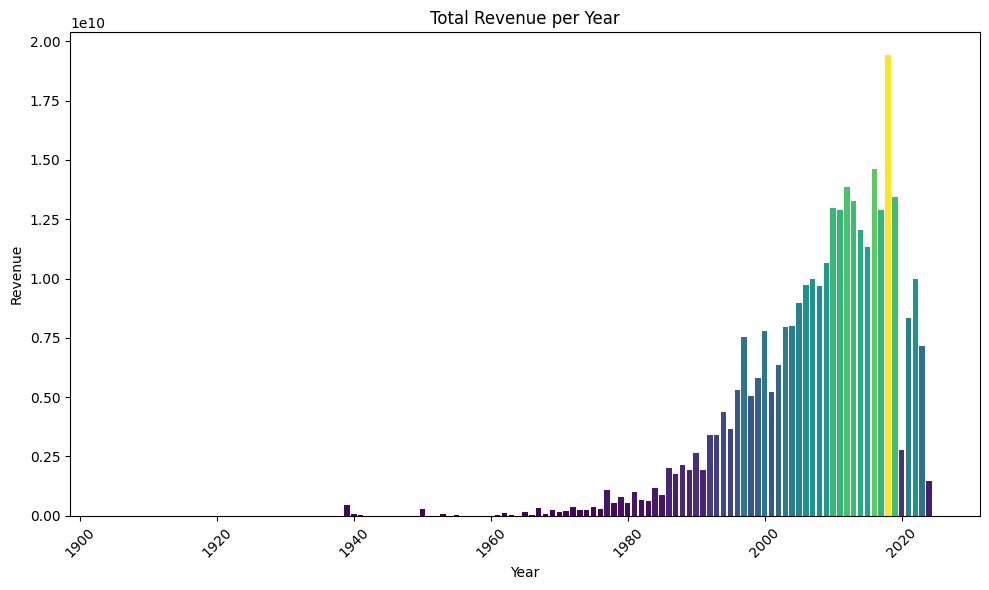

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_rev_year['year'], df_rev_year['revenue'], color=plt.cm.viridis(df_rev_year['revenue'] / df_rev_year['revenue'].max()))
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Total Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

From plot above revenue has trend incrase, but in 2020 revenue is down, because have covid-19

In [ ]:
df_rev_month = df_filter_dr.groupby(['month'])['revenue'].sum().reset_index()

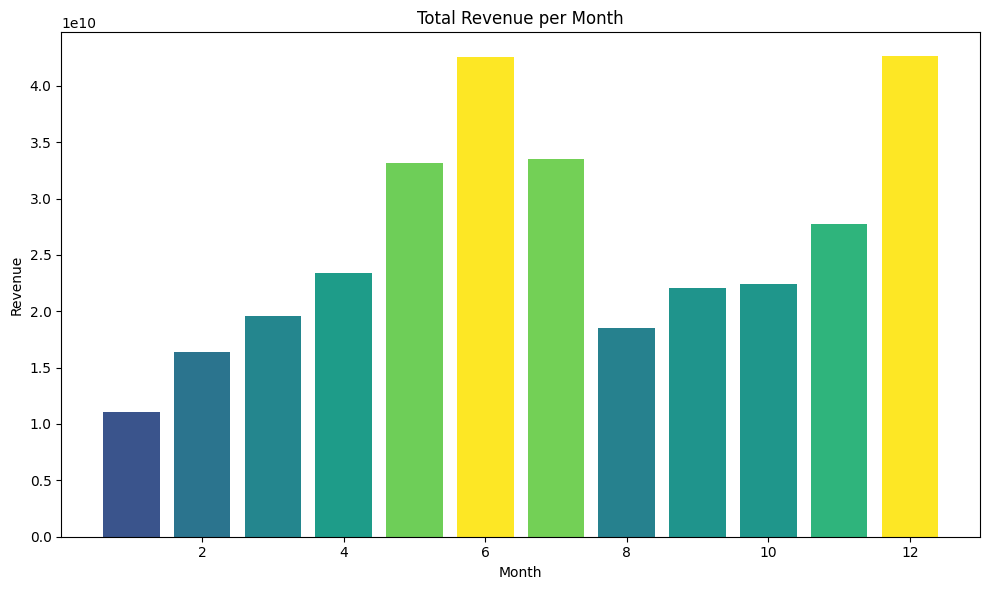

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_rev_month['month'], df_rev_month['revenue'],
               color=plt.cm.viridis(df_rev_month['revenue'] / df_rev_month['revenue'].max()))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Total Revenue per Month')
plt.tight_layout()
plt.show()

from plot above trend `revenue` incrase from mont 1 to month 6 and in month 7 decrase until month 8, and trend incrase again until month 12

In [ ]:
df_rev_day = df_filter_dr.groupby(['day'])['revenue'].sum().reset_index()

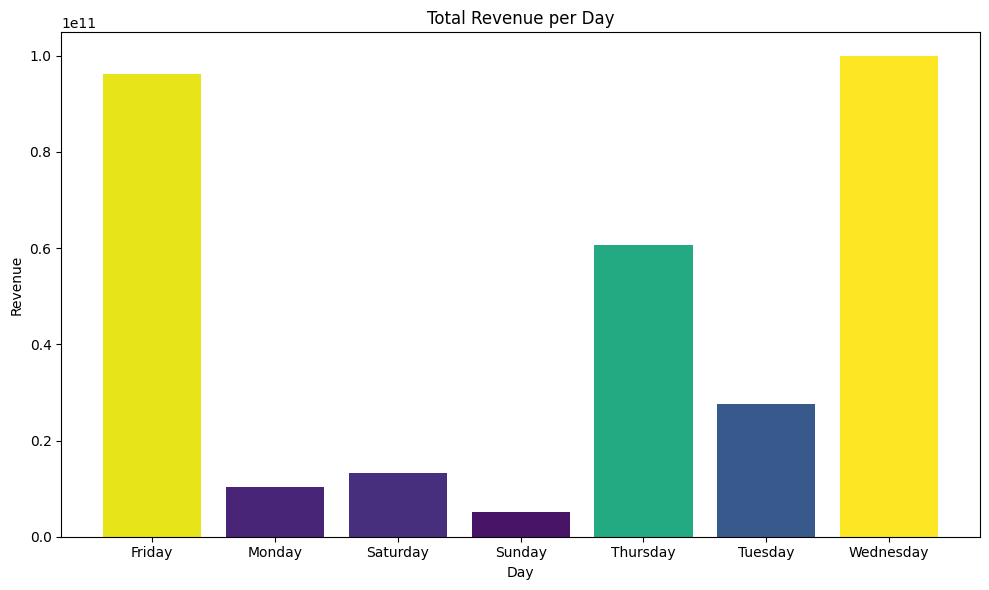

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_rev_day['day'], df_rev_day['revenue'],
               color=plt.cm.viridis(df_rev_day['revenue'] / df_rev_day['revenue'].max()))
plt.title('Total Revenue per Day')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

From plot above, `revenue` high only in `Friday` and `Wednesday`,in `Sunday` is lowest day

In [ ]:
brp = ['budget', 'revenue','popularity']
df_brp = df[brp]

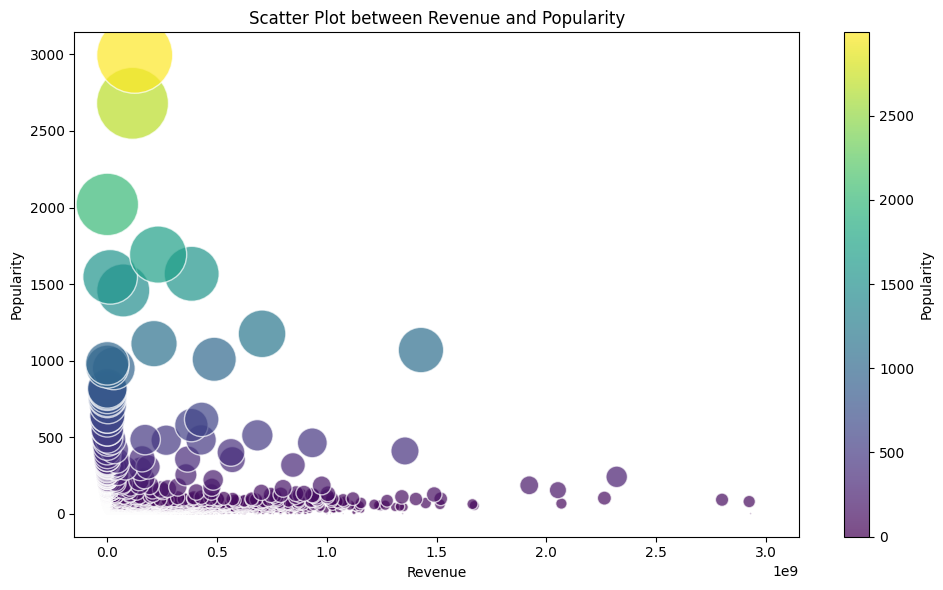

In [ ]:
df_brp = df_brp.sort_values('popularity')
sizes = df_brp['popularity']
colors = df_brp['popularity']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_brp['revenue'], df_brp['popularity'],
                      c=colors, s=sizes, cmap='viridis', alpha=0.7, edgecolors='w')
plt.title('Scatter Plot between Revenue and Popularity')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
cbar = plt.colorbar(scatter)
cbar.set_label('Popularity')
plt.tight_layout()
plt.show()

From plot above, we can see `popularity` high but `revenue` low, and `revenue` high but `popularity` low

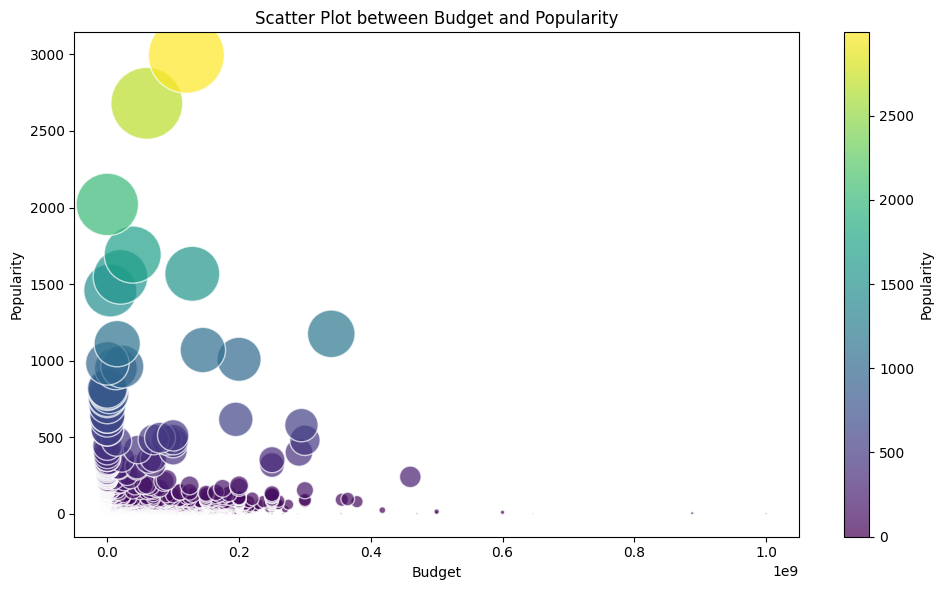

In [ ]:
df_brp = df_brp.sort_values('popularity')
sizes = df_brp['popularity']
colors = df_brp['popularity']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_brp['budget'], df_brp['popularity'],
                      c=colors, s=sizes, cmap='viridis', alpha=0.7, edgecolors='w')
plt.title('Scatter Plot between Budget and Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')
cbar = plt.colorbar(scatter)
cbar.set_label('Popularity')
plt.tight_layout()
plt.show()

from above plot `popularity` high but `budget` under 200 milion, and `budget` until 1 bilion but `popularity` only 1.4

In [ ]:
grp = ['genres', 'revenue','popularity']
df_grp = df[grp]
df_grp = df_grp.dropna()

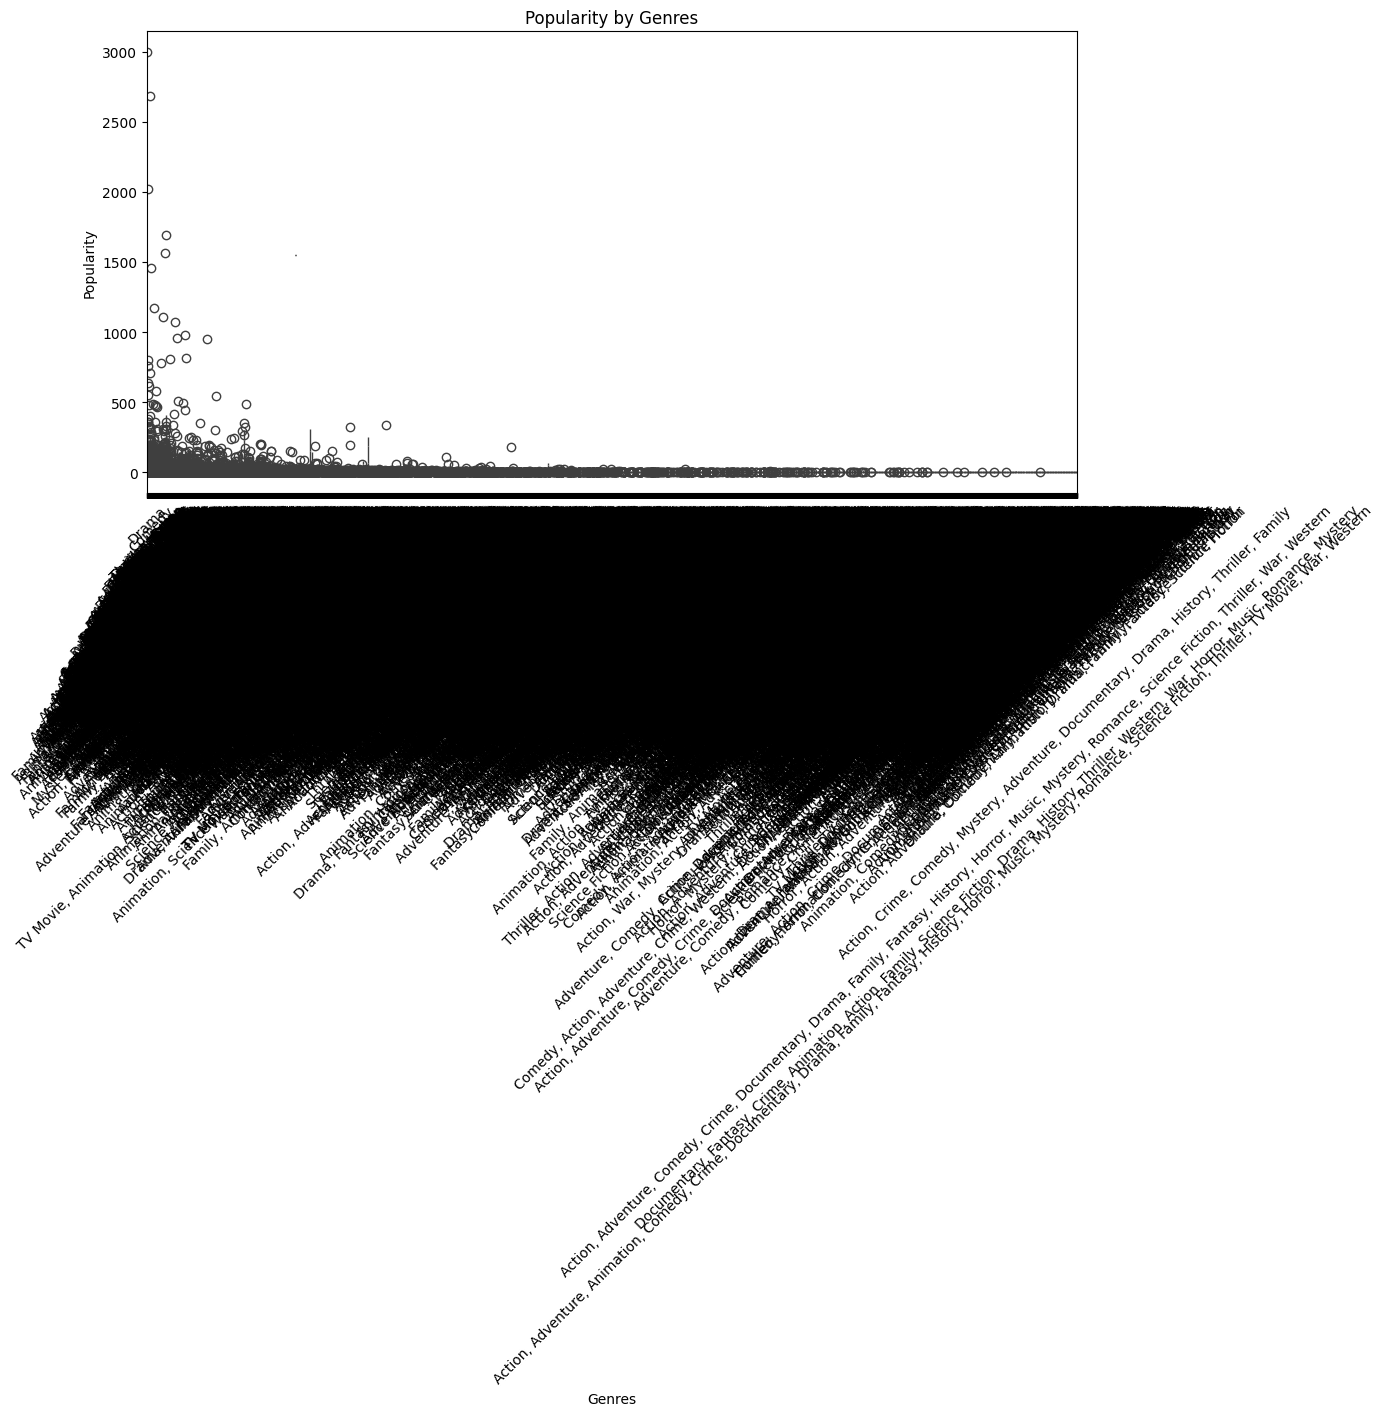

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_grp, x='genres', y='popularity')
plt.title('Popularity by Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

High popularity on `Genres` is `Action,Science Fiction,Adventure` and low `Genres` is `Animation,Drama,History,Horor,Fantasy`

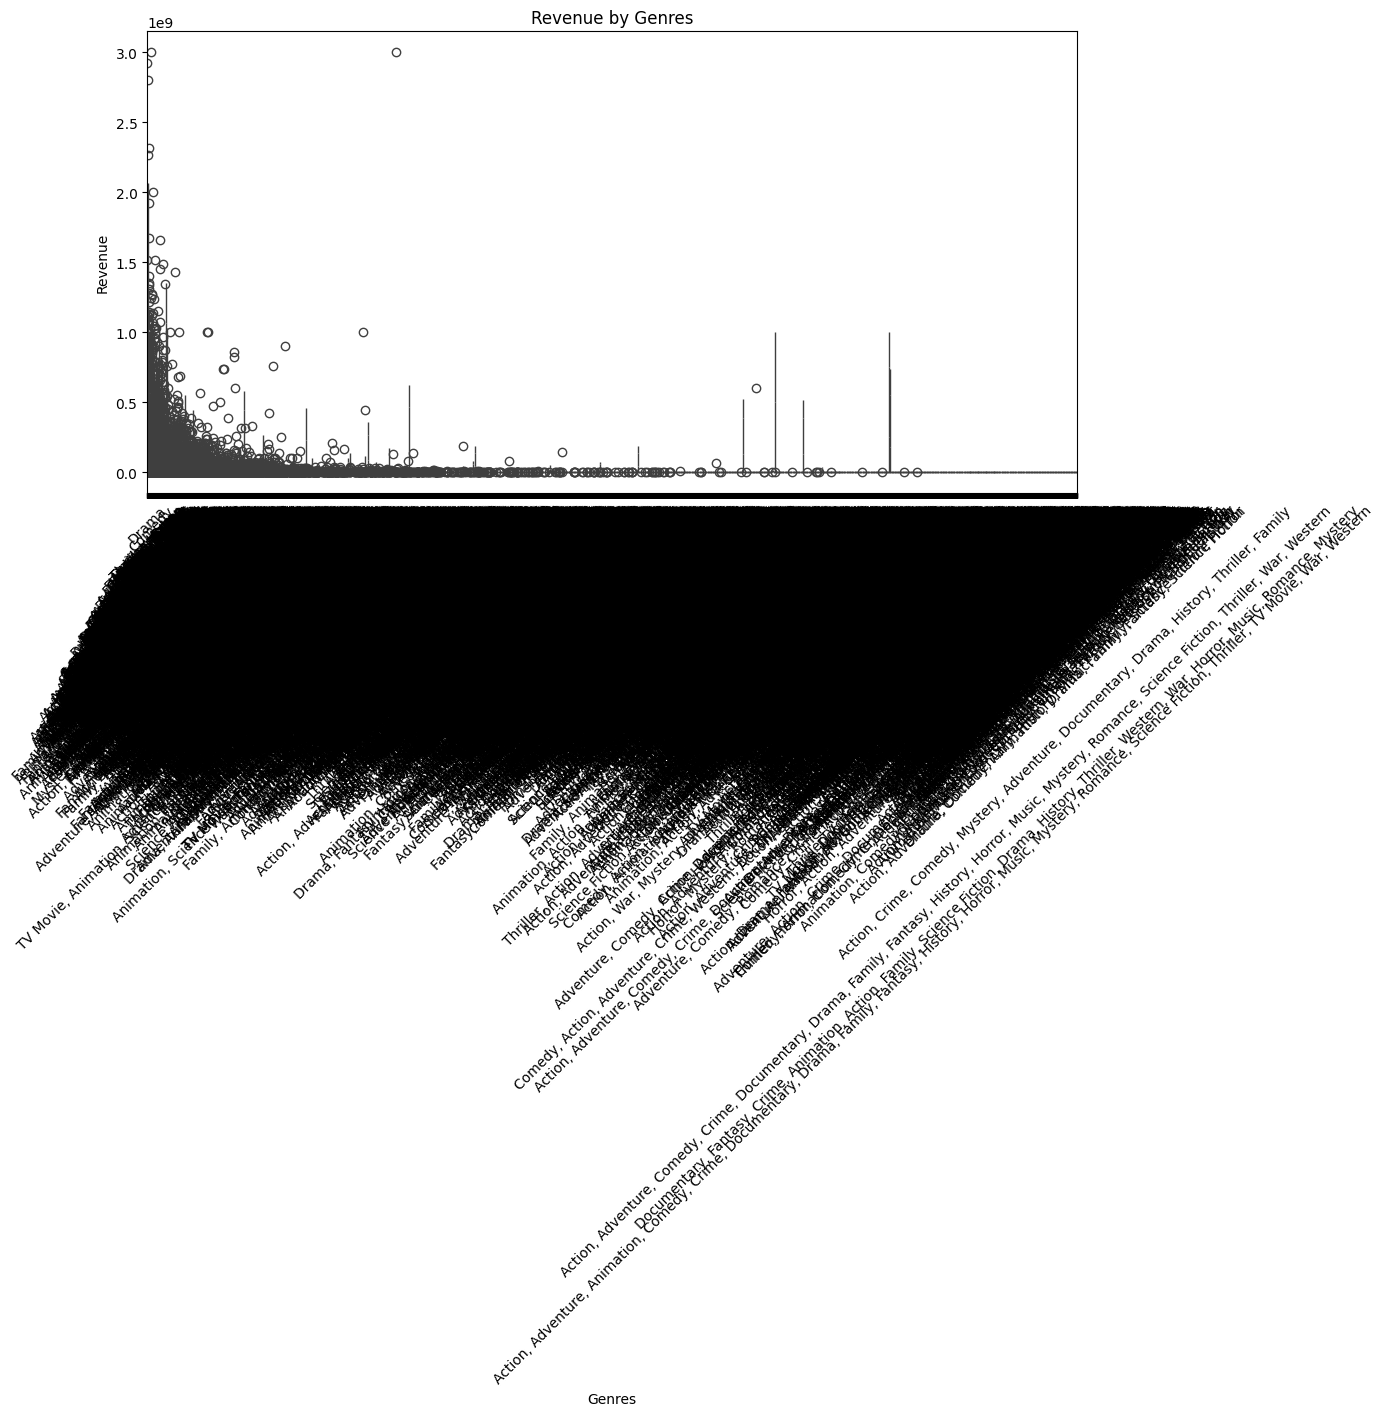

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_grp, x='genres', y='revenue')
plt.title('Revenue by Genres')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Genres` with `Revenue` until 3 bilion is `Drama,Comedy` and `Horror,war`

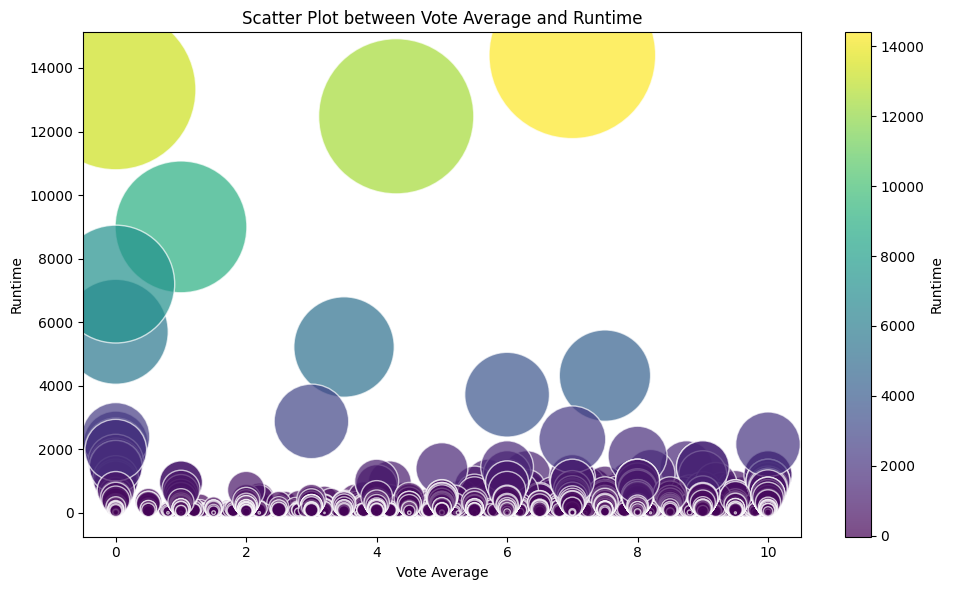

In [ ]:
sizes = df['runtime'].abs()
colors = df['runtime']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['vote_average'], df['runtime'],
                      c=colors, s=sizes, cmap='viridis', alpha=0.7, edgecolors='w')
plt.title('Scatter Plot between Vote Average and Runtime')
plt.xlabel('Vote Average')
plt.ylabel('Runtime')
cbar = plt.colorbar(scatter)
cbar.set_label('Runtime')
plt.tight_layout()
plt.show()

From above plot `Runtime` is 14400 with `Vote Average` is 7 and `Runtime` 13 with `Vote Average` 10

In [ ]:
date_title_popular = ['release_date', 'title', 'popularity', 'genres', 'revenue']
df_date_title_popular = df[date_title_popular]
df_date_title_popular = df_date_title_popular.dropna()
df_date_title_popular['release_date'] = pd.to_datetime(df_date_title_popular['release_date'])
df_date_title_popular['year'] = df_date_title_popular['release_date'].dt.year

In [ ]:
df_ypr_2018 = df_date_title_popular[(df_date_title_popular['year'] == 2018 ) &
 (df_date_title_popular['popularity'] > 50 ) & (df_date_title_popular['revenue'] > 1 )]

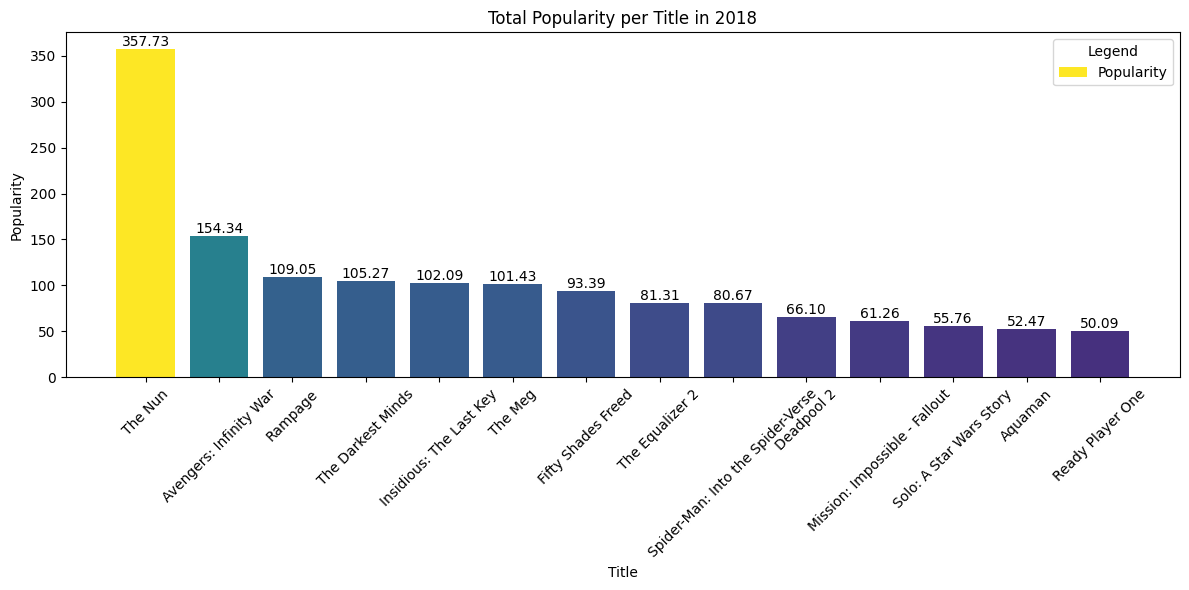

In [ ]:
df_ypr_2018 = df_ypr_2018.sort_values('popularity', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_ypr_2018['title'], df_ypr_2018['popularity'],
               color=plt.cm.viridis(df_ypr_2018['popularity'] / df_ypr_2018['popularity'].max()))
for bar, popularity in zip(bars, df_ypr_2018['popularity']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{popularity:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Total Popularity per Title in 2018')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.legend(['Popularity'], loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

in 2018 , `The Nun` is most `popularity`

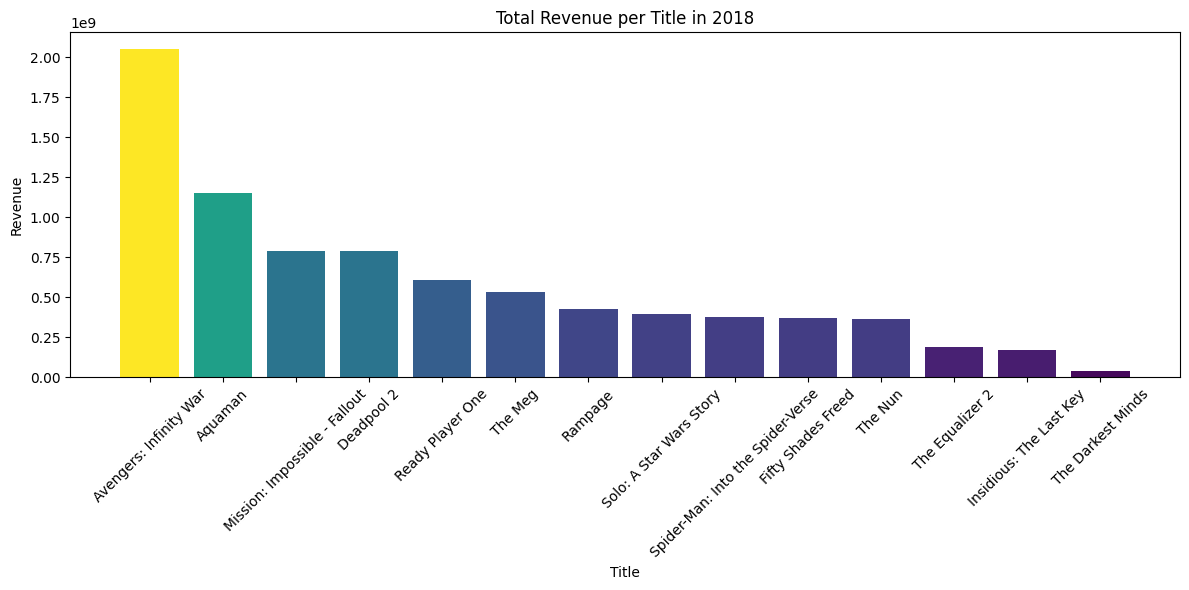

In [ ]:
df_ypr_2018 = df_ypr_2018.sort_values('revenue', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_ypr_2018['title'], df_ypr_2018['revenue'],
               color=plt.cm.viridis(df_ypr_2018['revenue'] / df_ypr_2018['revenue'].max()))
plt.title('Total Revenue per Title in 2018')
plt.xlabel('Title')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from plot above `popularity` is not equal as `revenue`, in 2018 `Avengers: Infinity War` is highest `revenue`

In [ ]:
df_ypr_2018_all = df_date_title_popular[(df_date_title_popular['year'] == 2018 ) &
 (df_date_title_popular['popularity'] > 20 ) & (df_date_title_popular['revenue'] > 1 )]

In [ ]:
df_genre_mean_2018 = df_ypr_2018_all.groupby(['genres'])['popularity'].mean().reset_index()

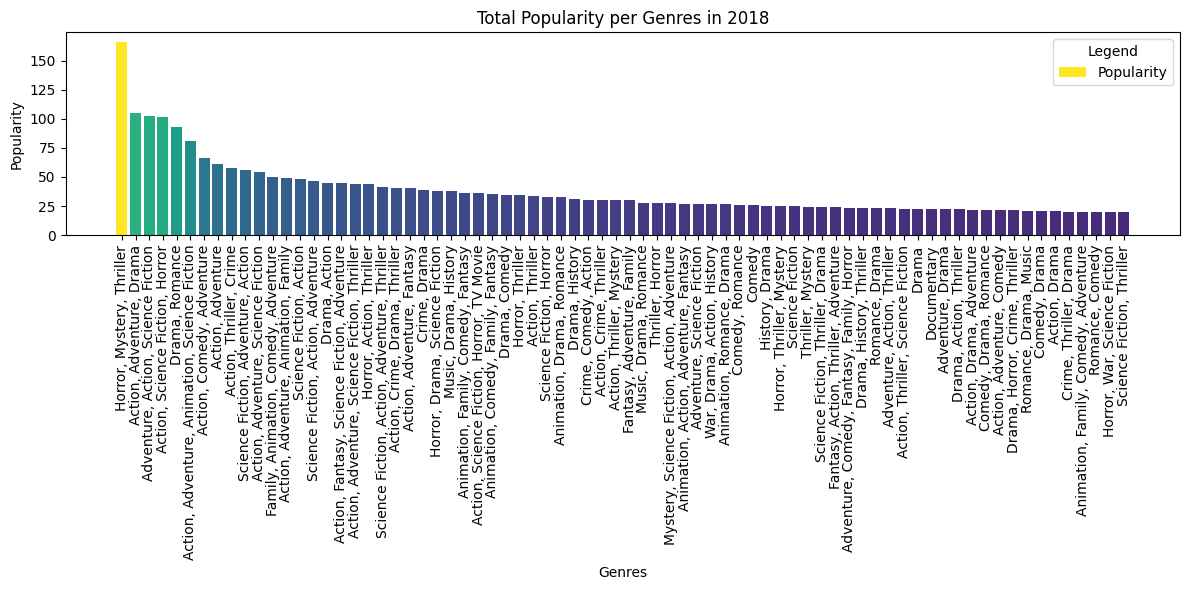

In [ ]:
df_genre_mean_2018 = df_genre_mean_2018.sort_values('popularity', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_genre_mean_2018['genres'], df_genre_mean_2018['popularity'],
               color=plt.cm.viridis(df_genre_mean_2018['popularity'] / df_genre_mean_2018['popularity'].max()))
plt.title('Total Popularity per Genres in 2018')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.legend(['Popularity'], loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

from above plot `genres` from `Horror,Mystery, Thriller` most popular

In [ ]:
df_genre_mean_rev_2018 = df_ypr_2018_all.groupby(['genres'])['revenue'].mean().reset_index()

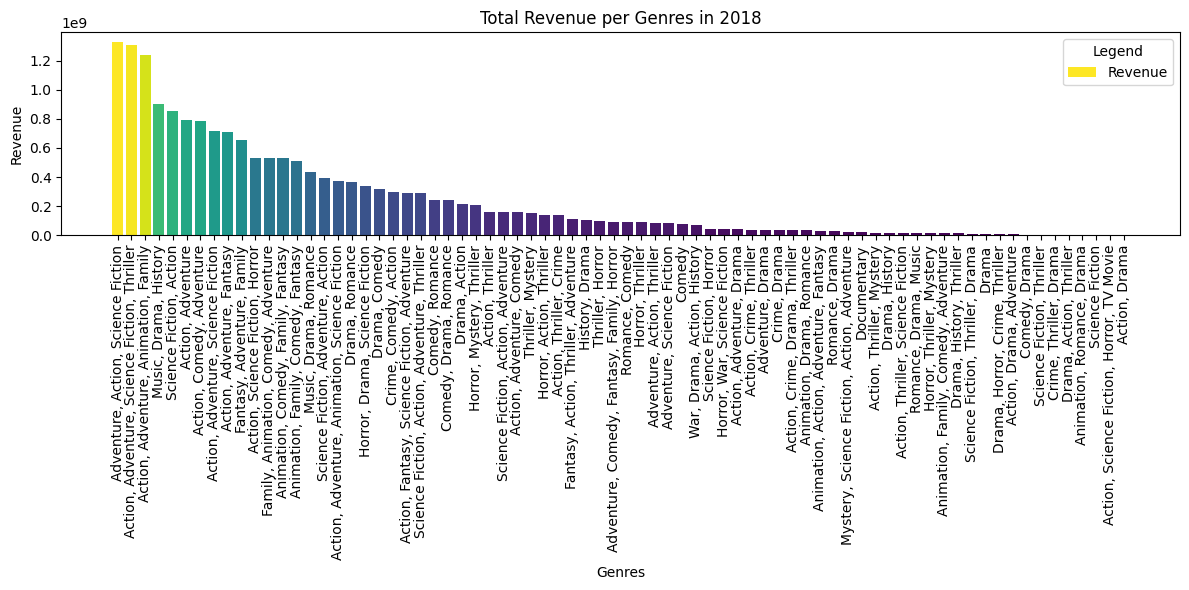

In [ ]:
df_genre_mean_rev_2018 = df_genre_mean_rev_2018.sort_values('revenue', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_genre_mean_rev_2018['genres'], df_genre_mean_rev_2018['revenue'],
               color=plt.cm.viridis(df_genre_mean_rev_2018['revenue'] / df_genre_mean_rev_2018['revenue'].max()))
plt.title('Total Revenue per Genres in 2018')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.legend(['Revenue'], loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

from plot above colour yellow, we can see 2 bar plot have similarities `genres` is `Adventure, Action, Science Fiction`

In [ ]:
date_title_pc_grb = ['release_date', 'title', 'production_companies', 'genres', 'revenue', 'budget', 'popularity']
df_date_title_pc_grb = df[date_title_pc_grb]
df_date_title_pc_grb = df_date_title_pc_grb.dropna()
df_date_title_pc_grb['release_date'] = pd.to_datetime(df_date_title_pc_grb['release_date'])
df_date_title_pc_grb['year'] = df_date_title_pc_grb['release_date'].dt.year
df_date_title_pc_grb['decade'] = (df_date_title_pc_grb['year'] // 10) * 10

In [ ]:
df_date_title_pc_grb['profit'] = df_date_title_pc_grb['revenue'] - df_date_title_pc_grb['budget']

In [ ]:
df_filter_2024 = df_date_title_pc_grb[(df_date_title_pc_grb['year'] > 1998 ) & (df_date_title_pc_grb['year'] < 2024 ) &
                                       (df_date_title_pc_grb['revenue'] > 1 )]
df_filter_2024['production_companies'] = df_filter_2024['production_companies'].replace({
    'Pixar, Walt Disney Pictures': 'Walt Disney Pictures, Pixar'})

In [ ]:
df_2024_pc_revenue = df_filter_2024.groupby(['production_companies'])['revenue'].sum().reset_index().nlargest(10, 'revenue')

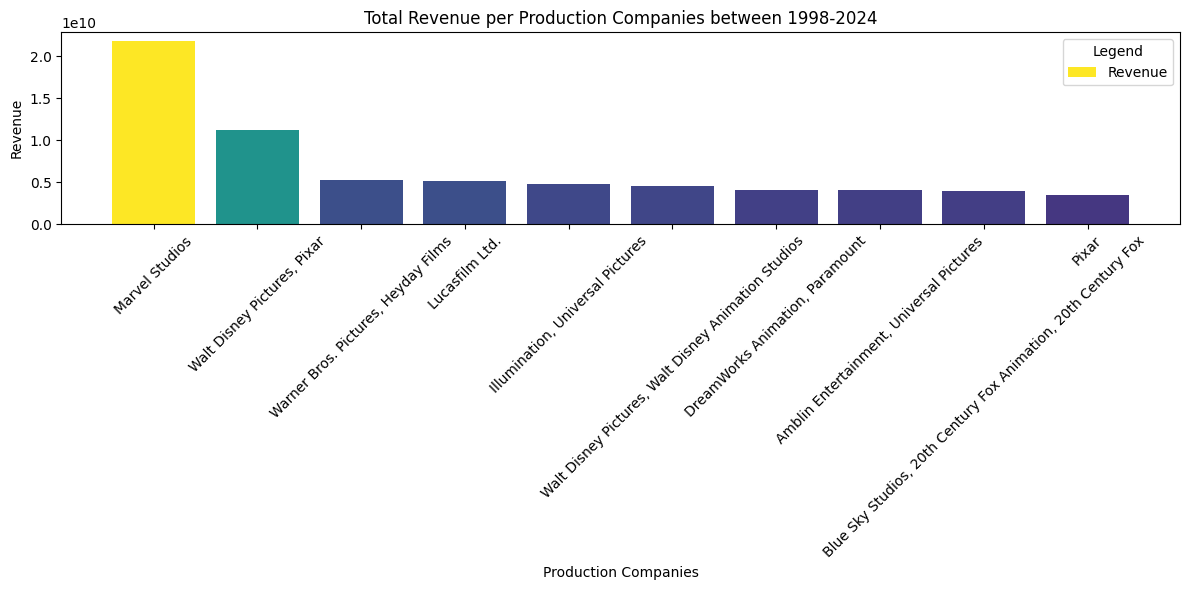

In [ ]:
df_2024_pc_revenue = df_2024_pc_revenue.sort_values('revenue', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_2024_pc_revenue['production_companies'], df_2024_pc_revenue['revenue'],
               color=plt.cm.viridis(df_2024_pc_revenue['revenue'] / df_2024_pc_revenue['revenue'].max()))
plt.title('Total Revenue per Production Companies between 1998-2024')
plt.xlabel('Production Companies')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(['Revenue'], loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

`revenue` biggest in `production_companies` is `Marvel Studio`

In [ ]:
df_2024_pc_budget = df_filter_2024.groupby(['production_companies'])['budget'].sum().reset_index().nlargest(10, 'budget')

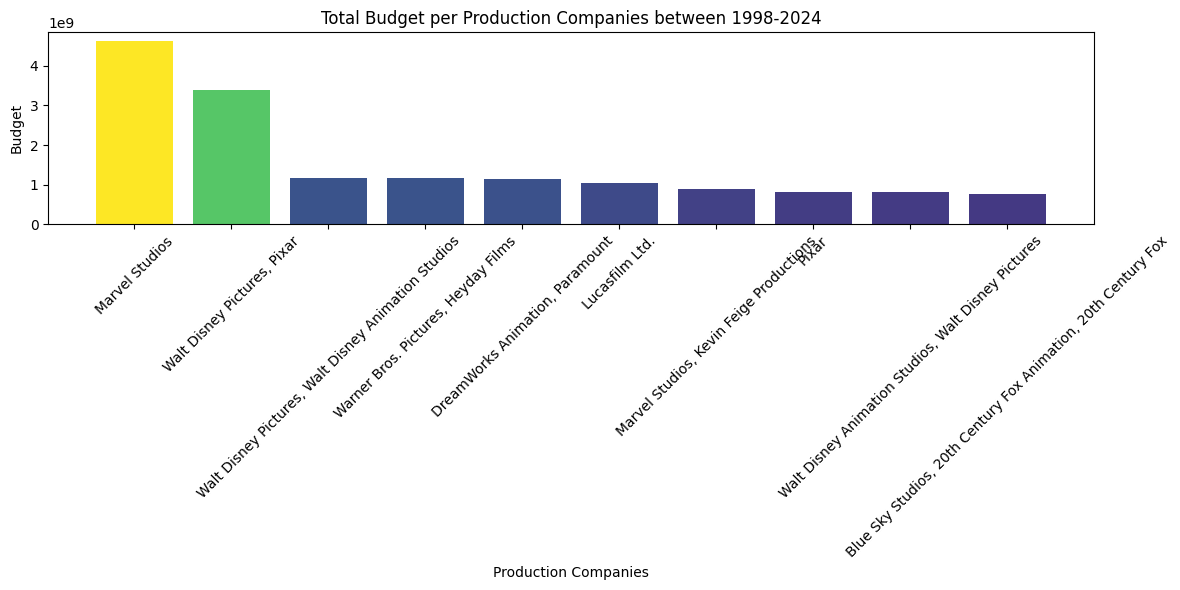

In [ ]:
df_2024_pc_budget = df_2024_pc_budget.sort_values('budget', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_2024_pc_budget['production_companies'], df_2024_pc_budget['budget'],
               color=plt.cm.viridis(df_2024_pc_budget['budget'] / df_2024_pc_budget['budget'].max()))
plt.title('Total Budget per Production Companies between 1998-2024')
plt.xlabel('Production Companies')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`production_companies` with `budget` biggest is `Marvel Studio`

In [ ]:
df_2024_pc_profit = df_filter_2024.groupby(['production_companies'])['profit'].sum().reset_index().nlargest(10, 'profit')

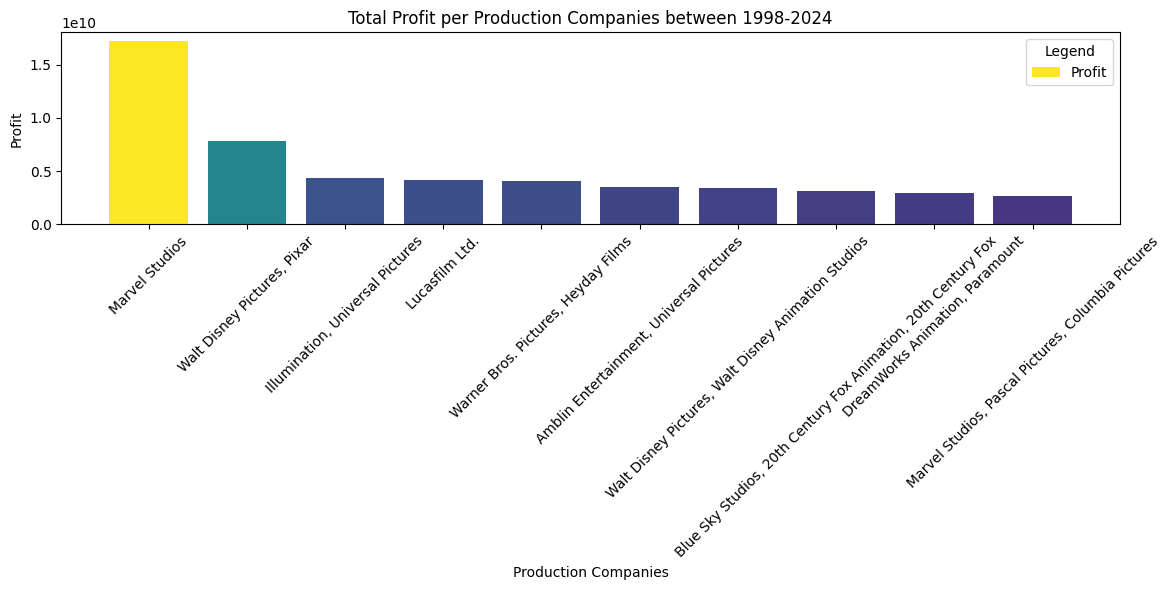

In [ ]:
df_2024_pc_profit = df_2024_pc_profit.sort_values('profit', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_2024_pc_profit['production_companies'], df_2024_pc_profit['profit'],
               color=plt.cm.viridis(df_2024_pc_profit['profit'] / df_2024_pc_profit['profit'].max()))
plt.title('Total Profit per Production Companies between 1998-2024')
plt.xlabel('Production Companies')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(['Profit'], loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

`production_companies` with `profit` biggest is `Marvel Studio`

In [ ]:
df_decade_genre = df_date_title_pc_grb.groupby(['decade', 'genres']).size().reset_index(name='count')

# Membuat plot
fig = px.bar(df_decade_genre,
             x='decade',
             y='count',
             color='genres',
             title='Number of Movies by Genre per Decade (1800-2024)',
             labels={'decade': 'Decade', 'count': 'Number of Movies'},
             barmode='stack')
fig.show()

From above plot `genres` almost in every decade is `Documentary`, and second large `genres` is `Drama`

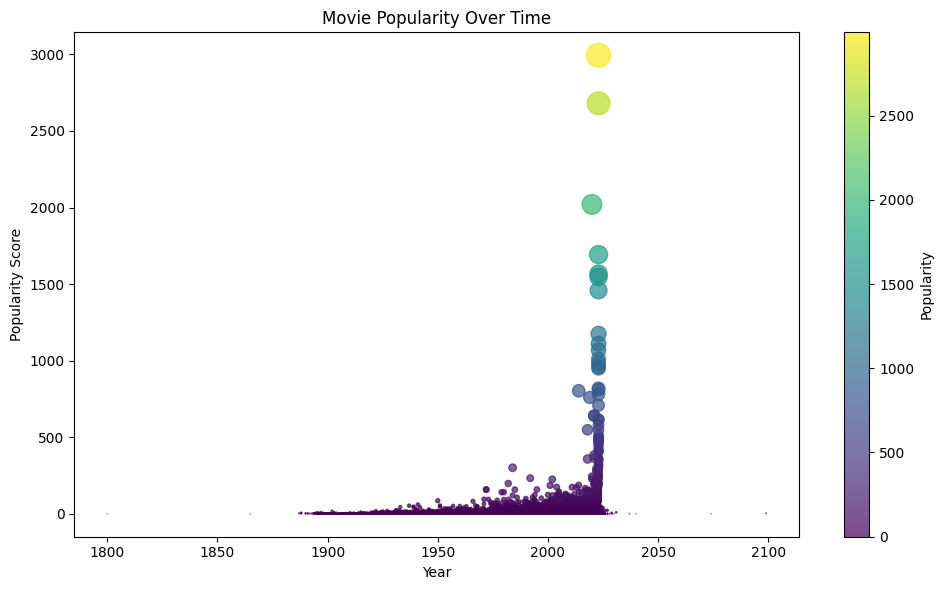

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_date_title_pc_grb['year'], df_date_title_pc_grb['popularity'],
                      c=df_date_title_pc_grb['popularity'], cmap='viridis', s=df_date_title_pc_grb['popularity'] / 10, alpha=0.7)
plt.title('Movie Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

Highest `popularity` is `Blue Battle` in 2023

In [ ]:
nlp = ['overview', 'popularity', 'tagline', 'genres', 'production_companies', 'keywords']
df_nlp = df[nlp]
df_nlp = df_nlp.dropna()

In [ ]:
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
df_nlp['cleaned_overview'] = df_nlp['overview'].apply(preprocess_text)

Use algorithms like Latent Dirichlet Allocation (LDA) to find themes or topics in movie overviews.

In [ ]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df_nlp['cleaned_overview'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display the topics
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))

Topic 1:
gang help group team man new town murder war world
Topic 2:
man friend family new story film woman love young life


Use libraries VADER to analyze the positive, negative, or neutral sentiment of the overview.

In [ ]:
def get_sentiment_tb(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_nlp['sentiment'] = df_nlp['overview'].apply(get_sentiment_tb)

In [ ]:
df_nlp['sentiment'].value_counts()

sentiment
Positive    33717
Negative    20018
Neutral      8274
Name: count, dtype: int64

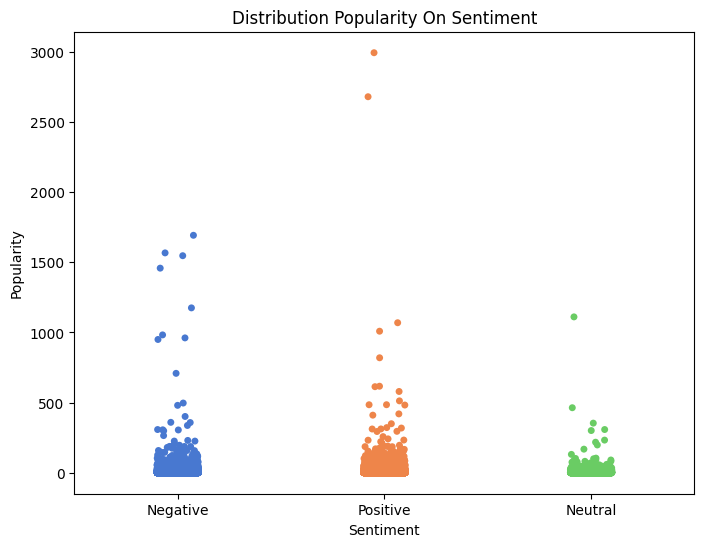

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='sentiment', y='popularity', data=df_nlp, jitter=True, palette='muted')
plt.title("Distribution Popularity On Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Popularity")
plt.show()

Use the word cloud visualization to see the words that appear frequently in the movie overview.

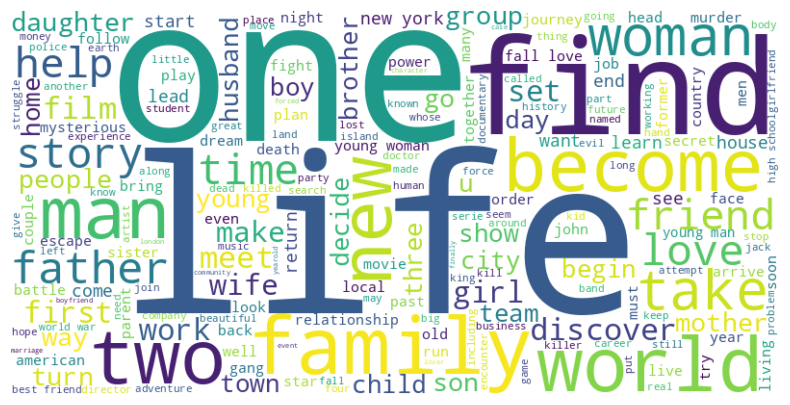

In [ ]:
text = ' '.join(df_nlp['cleaned_overview'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Use libraries like spaCy to recognize entities like character names, places, or organizations in the overview

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Apply NER
df_nlp['entities'] = df_nlp['overview'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
print(df_nlp[['overview', 'entities']])

                                                  overview  \
0        Cobb, a skilled thief who commits corporate es...   
1        The adventures of a group of explorers who mak...   
2        Batman raises the stakes in his war on crime. ...   
3        In the 22nd century, a paraplegic Marine is di...   
4        When an unexpected enemy emerges and threatens...   
...                                                    ...   
1143338  In a devastated near-future Korea, a family ve...   
1143432  Once upon a time there was a paper boat, who l...   
1143550  French Club is a Goonies-esque, teenage girl a...   
1143578  Silence just might be on the verge of extincti...   
1143615  Penelope boards a plane from London to Budapes...   

                                                  entities  
0                                            [(Cobb, ORG)]  
1                                                       []  
2        [(Batman, WORK_OF_ART), (Jim Gordon, PERSON), ...  
3        [(

Use TF-IDF and clustering algorithms such as KMeans to group movie overviews based on similarities.

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_nlp['cleaned_overview'])

# Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_nlp['cluster'] = kmeans.fit_predict(X)

print(df_nlp[['overview', 'cluster']])

                                                  overview  cluster
0        Cobb, a skilled thief who commits corporate es...        2
1        The adventures of a group of explorers who mak...        0
2        Batman raises the stakes in his war on crime. ...        0
3        In the 22nd century, a paraplegic Marine is di...        0
4        When an unexpected enemy emerges and threatens...        0
...                                                    ...      ...
1143338  In a devastated near-future Korea, a family ve...        3
1143432  Once upon a time there was a paper boat, who l...        2
1143550  French Club is a Goonies-esque, teenage girl a...        1
1143578  Silence just might be on the verge of extincti...        0
1143615  Penelope boards a plane from London to Budapes...        0

[62009 rows x 2 columns]


In [ ]:
df_nlp['cluster'].value_counts()

cluster
0    45644
2     7376
3     5684
1     3305
Name: count, dtype: int64

**Movie Recomendation System**

In [ ]:
recomend_system = ['title','genres', 'production_companies', 'spoken_languages', 'popularity']
df_recomend_system = df[recomend_system]
df_recomend_system = df_recomend_system.dropna()

We take column `title`, `genres`, `prodution_companies`, `spoken_laguages` and `popularity`

In [ ]:
df_recomend_system = df_recomend_system[(df_recomend_system['popularity'] > 20 )]

Filter only `popularity` more than 20

In [ ]:
df_recomend_system['combined_features'] = df_recomend_system['genres'] + ' ' + df_recomend_system['production_companies'] + ' ' + df_recomend_system['spoken_languages']
vectorizer = CountVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df_recomend_system['combined_features'])
cosine_sim = cosine_similarity(feature_matrix)

Combine column `genres`, `production_companies` and `spoken_languages`, generate to vector, transform to matrix and apply use cosine similarity

In [ ]:
def recommend_movies(title, cosine_sim=cosine_sim):
    idx = df_recomend_system[df_recomend_system['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]
    movie_indices = [i[0] for i in sim_scores]
    return df_recomend_system['title'].iloc[movie_indices]

Make definition from data frame move recomendation system above

In [ ]:
print("Recomendation Movie For 'Interstellar':")
print(recommend_movies('Interstellar'))

Recomendation Movie For 'Interstellar':
1065493           Dune: Part Two
309                         Dune
932        Pacific Rim: Uprising
Name: title, dtype: object


**Conclussion**

1. `revenue` biggest in year **2018**, in every month `revenue` biggest in month **6 and 12**, day `revenue` biggest in **wednesday** and **friday**
2. `revenue` is not directly proportional to `popularity`, and `budget` is not directly proportional to `revenue`.
3. highest `popularity` in `genres` is **Action, Science Fiction, Adventure**. highest `revenue` with `genres` **Horror, War and Drama, Comedy**.
4. The `Runtime` is 14400 with a `Vote Average` of 7 and `Runtime` is 13 with a `Vote Average` of 10. The `Runtime` is not directly proportional to the `Vote Average`.
5. Let's take 2018 as a sample with the highest `revenue`, the `title` with the highest popularity is **The Nun**, and the highest `revenue` is **Avangers: Infinity War**, while the highest `popularity` is **Horror, Mystery, Thriller**. While the highest `revenue` is **Action, Adventure, Science Fiction, Thriller**
6. We widened the year range from 1998 to 2024. The highest `revenue` with `production_companies` is **Marvel Studios**, and the highest `budget` is **Marvel Studios**, and the highest `profit` is **Marvel Studios**.
7. We filter again for a wider range of years between 1800-2024. The most produced `genre` is **Documentary** reaching 20,000 from 2010 to 2020. The `title` with the highest `popularity` is **Blue Battle** in 2023.
8. `sentiment` **Positive** have highest `popularity`

**Reference**

https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data